# ONLINE RETAIL 

In [421]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import plotly.graph_objs as go
from plotly.offline import iplot

In [422]:
df = pd.read_csv('OnlineRetail.csv', encoding='latin-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [423]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**541.909 rows & 8 columns**

In [424]:
df.shape

(541909, 8)

Data Description

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


"Description": 1.454 null values 
"CustomerID": 135.080 null values 

In [426]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [427]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [428]:
df["TotalRevenue"] = df["Quantity"]* df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


'UnitPrice' = zero value. 
As it´s not correct send out invoices with zero values and any exception it´s not specified, I´ve removed these rows from dataset.

In [429]:
retail = df[df['UnitPrice']!= 0]

New dataset : 539394 rows & 8 columns

In [430]:
retail.shape

(539394, 9)

# INVOICES
**Filter by column 'InvoiceNo', values startswith('5')**

In [431]:
orders = retail[retail['InvoiceNo'].astype(str).str.startswith('5')]

In [432]:
print("Total no. of invoices:", orders['InvoiceNo'].nunique())
print("No. of products sold:",orders['Quantity'].sum())
print("Total invoiced:",orders['TotalRevenue'].sum().round(2))
print("No. of customers:", retail['CustomerID'].nunique())

Total no. of invoices: 19959
No. of products sold: 5588375
Total invoiced: 10655622.48
No. of customers: 4371


# CREDIT NOTES
**Filter by column 'InvoiceNo', values startswith('C')**

In [433]:
cancelled_orders = retail[retail['InvoiceNo'].astype(str).str.startswith('C')]
cancelled_orders.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96


In [434]:
print("Total no. of credit notes:", cancelled_orders['InvoiceNo'].nunique())
print("No. of products returned:",cancelled_orders['Quantity'].sum())
print("Total credited:",cancelled_orders['TotalRevenue'].sum().round(2))

Total no. of credit notes: 3836
No. of products returned: -277574
Total credited: -896812.49


**RETURNED PRODUCTS.( order ascending)**

In [435]:
cancelled_orders.groupby("Description")["Quantity"].sum().sort_values(ascending = True)

Description
PAPER CRAFT , LITTLE BIRDIE           -80995
MEDIUM CERAMIC TOP STORAGE JAR        -74494
ROTATING SILVER ANGELS T-LIGHT HLDR    -9376
Manual                                 -4066
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
                                       ...  
DECORATIVE CATS BATHROOM BOTTLE           -1
SET OF 6 T-LIGHTS CACTI                   -1
GEORGIAN TRINKET BOX                      -1
CURIO CABINET LINEN AND LACE              -1
RED DRAGONFLY HELICOPTER                  -1
Name: Quantity, Length: 1972, dtype: int64

**TOTAL ADJUSTS. 'InvoiceNo'= contains('A')**

In [436]:
adjust = retail[retail['InvoiceNo'].astype(str).str.contains('A')]
adjust.head()
print("Total adjusts for bad debts:",len(adjust))
print("Total Adjusts:",adjust['TotalRevenue'].sum().round(2))

Total adjusts for bad debts: 3
Total Adjusts: -11062.06


**AVERAGE ORDER PRICE**

In [437]:
round(orders.groupby("InvoiceNo")["UnitPrice"].sum().mean(),2)

103.23

In [438]:
orders.groupby("InvoiceNo")["UnitPrice"].sum().sort_values(ascending = False)

InvoiceNo
537632    13541.33
551697     8142.75
573585     7031.36
562955     6688.05
571751     6068.06
            ...   
546390        0.12
567869        0.08
559166        0.06
544152        0.06
560599        0.06
Name: UnitPrice, Length: 19959, dtype: float64

# DATES
Change type value ["InvoiceDate"] from object to datetime

In [439]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [440]:
retail['Year'] = pd.DatetimeIndex(retail['InvoiceDate']).year
retail['Month'] = pd.DatetimeIndex(retail['InvoiceDate']).month

**Amount of invoices per Month**

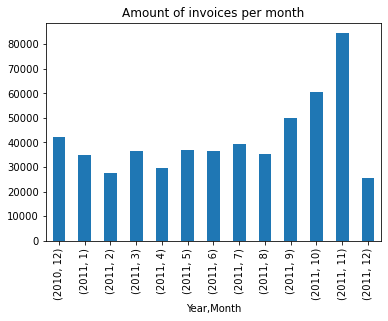

In [441]:
retail.groupby(['Year', 'Month']).InvoiceNo.count().plot(kind='bar', title='Amount of invoices per month')
plt.show()

**Amount of Customers per Month**

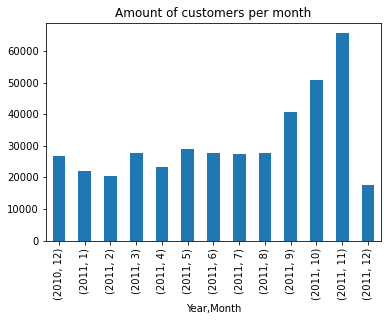

In [442]:
retail.groupby(['Year', 'Month']).CustomerID.count().plot(kind='bar', title='Amount of customers per month')
plt.show()

**What´s the best day of the week to sale?** **What´s the best hour to sale ?**

In [443]:
# HOUR
retail['Hour'] = retail['InvoiceDate'].dt.hour

# WEEKDAY. dt.weekday. The day of the week with Monday=0, Sunday=6.
#This method is available on both Series with datetime values or DatetimeIndex.
retail['WeekDay']=retail['InvoiceDate'].dt.weekday
retail['WeekDay'] = retail['WeekDay'].replace({0:'Mon', 1:'Thu',2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'})

**What´s the best day of the week to sale? Thursday!**

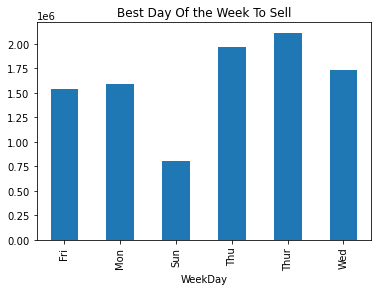

In [444]:
retail.groupby('WeekDay').TotalRevenue.sum().plot(kind='bar', title='Best Day Of the Week To Sell')
plt.show()

**What´s the best hour to sell? It´s at 12am**

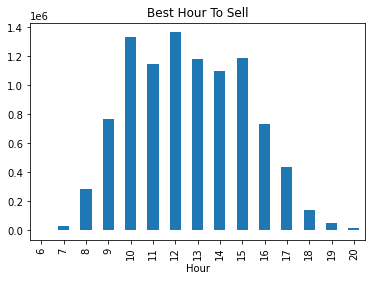

In [445]:
retail.groupby('Hour').TotalRevenue.sum().plot(kind='bar', title='Best Hour To Sell')
plt.show()

In [446]:
retail.set_index("InvoiceDate", inplace= True)

In [447]:
retail.index = pd.to_datetime(retail.index)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalRevenue,Year,Month,Hour,WeekDay
InvoiceDate,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010,12,8,Wed
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010,12,8,Wed
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010,12,8,Wed
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010,12,8,Wed
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010,12,8,Wed


**NO. OF PRODUCTS SOLD BY MONTH**

In [448]:
retail.resample("M").sum()["Quantity"]

InvoiceDate
2010-12-31    343197
2011-01-31    307940
2011-02-28    280684
2011-03-31    372131
2011-04-30    295170
2011-05-31    389870
2011-06-30    381851
2011-07-31    395731
2011-08-31    409426
2011-09-30    563391
2011-10-31    598860
2011-11-30    741886
2011-12-31    230667
Freq: M, Name: Quantity, dtype: int64

**TOTAL REVENUE BY MONTH**

In [449]:
retail.resample("M")["TotalRevenue"].sum().round(2)

InvoiceDate
2010-12-31     748957.02
2011-01-31     560000.26
2011-02-28     498062.65
2011-03-31     683267.08
2011-04-30     493207.12
2011-05-31     723333.51
2011-06-30     691123.12
2011-07-31     681300.11
2011-08-31     682680.51
2011-09-30    1019687.62
2011-10-31    1070704.67
2011-11-30    1461756.25
2011-12-31     433668.01
Freq: M, Name: TotalRevenue, dtype: float64

November was the month with the highest turnover

In [450]:
retail.resample("M")["TotalRevenue"].sum().round(2).max()

1461756.25

**BEST SELLER RANK. ( top 20 products)**

In [451]:
retail.groupby("Description")["Quantity"].sum().sort_values(ascending = False).head(20)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47359
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35313
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26111
PACK OF 60 PINK PAISLEY CAKE CASES    24753
VICTORIAN GLASS HANGING T-LIGHT       23854
ASSORTED COLOURS SILK FAN             23082
BROCADE RING PURSE                    23053
RED  HARMONICA IN BOX                 21866
JUMBO BAG PINK POLKADOT               21009
SMALL POPCORN HOLDER                  20116
PAPER CHAIN KIT 50'S CHRISTMAS        18902
LUNCH BAG RED RETROSPOT               18779
60 TEATIME FAIRY CAKE CASES           18040
PARTY BUNTING                         18018
Name: Quantity, dtype: int64

# COUNTRIES 
36 countries. 
2 country values wrongly categorized: "Unspecified" & "European Community". 

In [452]:
countries = retail["Country"].nunique()
countries

38

**No. of products sold by Country**

In [460]:
products_total = retail.groupby("Country").count()["TotalRevenue"].sort_values(ascending = False)[0:10]
products_total

Country
United Kingdom    492981
Germany             9493
France              8556
EIRE                8192
Spain               2532
Netherlands         2367
Belgium             2069
Switzerland         2001
Portugal            1519
Australia           1256
Name: TotalRevenue, dtype: int64

**Revenue by Country**

In [459]:
countries_total = retail.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)[0:10]
countries_total

Country
United Kingdom    8.187806e+06
Netherlands       2.846615e+05
EIRE              2.632768e+05
Germany           2.216982e+05
France            1.974039e+05
Australia         1.370773e+05
Switzerland       5.638535e+04
Spain             5.477458e+04
Belgium           4.091096e+04
Sweden            3.659591e+04
Name: TotalRevenue, dtype: float64

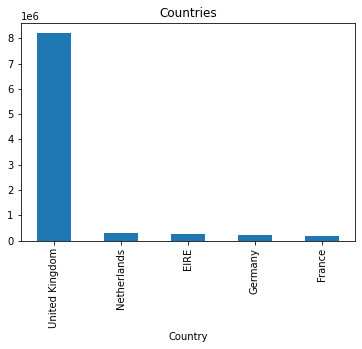

In [456]:
countries_total[:5].plot(kind='bar',title= "Countries")
plt.show()

In [462]:
print('Percentage of sales in UK : {}/{} ({:.2f}%) '.format(countries_total[0].round(2),countries_total.sum().round(2), countries_total[0]/countries_total.sum()*100))
print('Percentage of products sold in UK : {}/{} ({:.2f}%) '.format(products_total[0].round(2),products_total.sum().round(2), products_total[0]/products_total.sum()*100))

Percentage of sales in UK : 8187806.36/9480590.9 (86.36%) 
Percentage of products sold in UK : 492981/530966 (92.85%) 
